In [1]:
1+2

3

In [2]:
import math
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

In [3]:
from IPython.display import Math
from IPython.display import Latex
Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

<IPython.core.display.Math object>

Exponential distribution
===========
<a id='the_destination'></a>
* Describes the time between events in a Poisson process, 
  * i.e. a process in which events occur continuously and independently at a constant average rate. 
* It is a particular case of the gamma distribution.
* It is the continuous analogue of the geometric distribution, 
* Tt has the key property of being memoryless.

Statistics:
* $x \ge 0$
* pdf: $f(x) = \lambda * e^{-\lambda x}$
* cdf: $F(x) = 1 - e^{-\lambda x}$
* Mean: $1 / \lambda$
* Variance: $1 / \lambda^2$

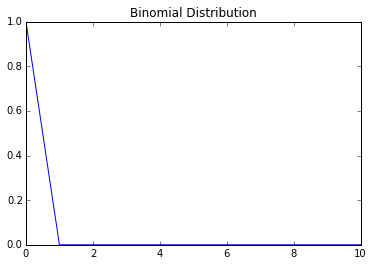

<function __main__.show_binomial>

In [4]:
##  distributions

# 1. binomial distribution
# peaks at p*n, sliding off on either side to zero
# with high slope on the side close to the extremes
from operator import mul    # or mul=lambda x,y:x*y
from fractions import Fraction
from functools import reduce

def nCk(n,k): 
  return int( reduce(mul, (Fraction(n-i, i+1) for i in range(k)), 1) )

def show_binomial(n,p):
    x = range(n+1)
    y = [nCk(n, k)*(p**k)*((1-p)**(n-k)) for k in x]
    plt.plot(x, y)
    plt.title('Binomial Distribution')
    plt.show()
    

interact(show_binomial, n=(0,20),p=(0,1,0.1))

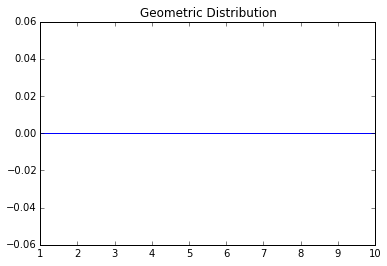

<function __main__.show_geometric>

In [5]:
# geometric distribution
# as p increases, the curve becomes more steep
# ie, the probability of succeeding in earlier trials increases
# thereby reducing the probability of success at latter trials
def show_geometric(p, k):
    x = range(1,k+1)
    y = [p*(1-p)**(kk-1) for kk in x]
    plt.plot(x, y)
    plt.title('Geometric Distribution')
    plt.show()
interact(show_geometric, p=(0,1,0.1), k=(1,20))

Memorylessness
================

[wiki](http://www.wikiwand.com/en/Memorylessness)

A probability distribution is memoryless only if $P( X>(s+t) | X>s ) = P(X>t)$.  
This holds for both discrete and continuous random variables.

pretty vague but here is an example.  
Let $X$ be the number of trials until the first success in a probability distribution 
Then, 
$P(X>(10+20) | X>20) = P(X>10)$  
The distribution forgets the fact $X>2$

As another example,  
suppose X is the lifetime of a car engine given in terms of number of miles driven.   
If the engine has lasted 200,000 miles, then, based on our intuition,   
it is clear that the probability that the engine lasts another 100,000 miles  
is not the same as the engine lasting 100,000 miles from the first time it was built.  
However, memorylessness states that the two probabilities are the same.   
In essence, we 'forget' what state the car is in.   
In other words, the probabilities are not influenced by how much time has elapsed.

The only memoryless discrete probability distributions are the geometric distributions,  
which feature the number of independent Bernoulli trials needed to get one "success,"  
with a fixed probability p of "success" on each trial.  
In other words those are the distributions of waiting time in a Bernoulli process.  

Poisson Distribution
===============

* Discrete probability distribution
* Expresses the probability of a given number of events occurring in a fixed interval of time and/or space if these events occur with a known average rate and independently of the time since the last event
* Can be applied to systems with large number of possible events, each of which is rare.
* [Infinitely Divisible]( http://www.wikiwand.com/en/Infinite_divisibility_%28probability%29 )

Occurrence  
* Examples: Number of
  * Phone calls received by a call center per hour
  * Decay events per second from a radioactive source
  * Pedicabs in queue in a particular street in a given hour of a day.
* The Poisson distribution arises in connection with [Poisson processes](http://www.wikiwand.com/en/Poisson_process). It applies to various phenomena of discrete properties (that is, those that may happen 0, 1, 2, 3, ... times during a given period of time or in a given area) whenever the probability of the phenomenon happening is constant in time or space

**Probability Mass Function**  

$f(k; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}, \lambda > 0, k \ge 0$

** CDF **  
$F(k; \lambda) = \frac{\Gamma(\lfloor k+1\rfloor, \lambda)}{\lfloor k\rfloor !},$ or   
$e^{-\lambda} \sum_{i=0}^{\lfloor k\rfloor} \frac{\lambda^i}{i!}\ $

Statistics  
* Mean: $\lambda$
* Variance: $\lambda$

Note:  
1. $\lambda^k$ and $k!$ can easily lead to overflow. For numerical stability, the mass function should be evaluated as  
$\!f(k; \lambda)= \exp \left\{ {k\ln \lambda  - \lambda  - \ln \Gamma (k+1)} \right\}$  
the natural log of the gamma function is obtained using lgamma (in C) or gammaln (Matlab, SciPy)  

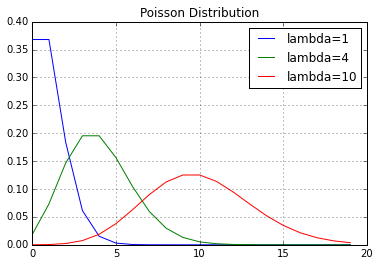

<function __main__.interact_poisson>

In [6]:
# poisson distribution
# the peak of the poisson moves along with the lambda, its mean
# which is quite obvious, since it is called the fucking mean
def compute_poisson(x, l):
    return math.e**(-l)*(l**x) / (math.factorial(x))

def show_all_poisson(x_max=20):
    params = [1, 4, 10]
    for ll in params:
        show_poisson(ll, 20)
    plt.legend()
    
    
def show_poisson(l, x_max):
    x = range(x_max)
    y = [compute_poisson(xx, l) for xx in x]
    plt.plot(x, y, label='lambda='+str(l))
    
def interact_poisson(l=4, x_max=20, show_all=True):
    if show_all:
        show_all_poisson(x_max)
    else:
        show_poisson(l, x_max)
    plt.grid()
    plt.title('Poisson Distribution')
    plt.show()
 
interact(interact_poisson, l=(0,100), x_max=(0,100))

Erlang Distribution
=========================

parameters:  
* positive shape parameter - $k$
* positive rate parameter - $\lambda$; sometimes, $\mu = 1/\lambda$, called scale parameter is used.
* $k = 1 ~ \rightarrow$ Exponential distribution
* Special case of Gamma distribution when $k \in \mathbb{R}$ and using the Gamma function instead of the factorial in the denominator
* Distribution of sum of $k$ independent exponential variables with mean $\mu$
* The number of telephone calls made at the same time to the operators of switching stations

pdf:  
$f(x; k,\lambda)={\lambda^k x^{k-1} e^{-\lambda x} \over (k-1)!}\quad\mbox{for }x, \lambda \geq 0,$  
* k - shape parameter
* $\lambda$ - rate parameter
* When $\mu = 2$, it simplifies to chi-squared distribution with $2k$ degrees of freedom 

cdf:  
$F(x; k,\lambda) = 1 - \sum_{n=0}^{k-1}\frac{1}{n!}e^{-\lambda x}(\lambda x)^n.$


Statistics:
* Mean: $k / \lambda$
* Variance: $k / \lambda^2$
* Mode: $\frac{1}{\lambda} (k-1)$ for $k \gt 1$


Occurrence:  
* Events that occur independently with some average rate are modeled with a [Poisson process](http://www.wikiwand.com/en/Poisson_process) 
* The waiting times between $k$ occurrences of the event are Erlang distributed
* FYI, the number of events in a given amount of time is described by a Poisson distribution

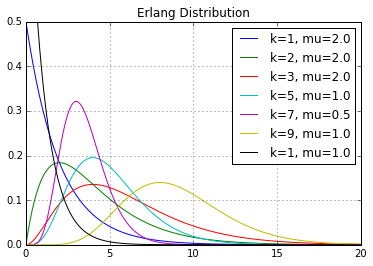

<function __main__.interact_erlang>

In [7]:
def compute_erlang(x, k, mu):
    l = 1./mu
    num = (l**k) * (x**(k-1)) * (math.exp(-l*x))
    den = math.factorial(k-1)
    return 1.*num/den

def show_erlang(k, mu):
    x = np.linspace(0, 20, 1000)
    y = [compute_erlang(xx, k, mu) for xx in x]
    plt.plot(x, y, label='k={0}, mu={1}'.format(k,mu))
    plt.title('Erlang Distribution')
    plt.grid()
    
def show_all_erlang():
    params = [[1,2.],[2,2.],[3,2.],[5,1.],[7,.5],[9,1.],[1,1.]]
    for param in params:
        show_erlang(param[0], param[1])
    plt.ylim(0,0.5)
    plt.legend()
    
def interact_erlang(k, mu, show_all=True):
    if show_all:
        show_all_erlang()
    else:
        show_erlang(k, mu)
    plt.show()
    
interact(interact_erlang, k=(1,10), mu=(1,5,0.5))


Gamma distribution
===========================


Gamma function: $\Gamma(n) = (n-1)!$ 

PDF:  
(using shape-scale parametrization)
$$f(x; \alpha, \beta) = \frac{x^{\alpha-1}  e^{-x/\beta}}{\beta^\alpha * \Gamma(\alpha)}$$  

* $\alpha$ is called the shape parameter
* $\beta$ stands for the scale parameter
  * $\frac{1}{\beta}$ is called the rate parameter  
  
CDF:  
$F(x; \alpha, \beta)
= \int_{0}^{x} ~ f(u; \alpha,\beta) du
= \tfrac{\gamma(\alpha, \frac{x}{\beta})}{\Gamma{\alpha}}
$


General parameterizations:  
1. With a shape parameter $\alpha$ and a scale parameter $\beta$.
2. With a shape parameter $\alpha$ and an inverse scale parameter $\frac{1}{\beta}$, called a rate parameter.
3. With a shape parameter $\alpha$ and a mean parameter $\mu = \frac{\alpha}{\beta}$

The shape-scale parameterization (1) with $\alpha$ and $\beta$ appears to be more common in econometrics and 
certain other applied fields, where e.g. the gamma distribution is 
frequently used to model waiting times.
For instance, in life testing, the waiting time until death is a random variable 
that is frequently modeled with a gamma distribution

The shape-rate parameterization with $\alpha$ and $1/\beta$ (2) is more common in Bayesian statistics, 
where the gamma distribution is used as a conjugate prior distribution 
for various types of inverse scale (aka rate) parameters, 
such as the $\lambda$ of an exponential distribution or a Poisson distribution[3] – 
or for that matter, the $\beta$ of the gamma distribution itself.

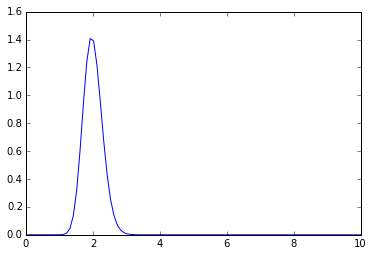

<function __main__.show_gamma>

In [8]:
import scipy.stats as ss

def show_gamma(alpha, beta):
    x = np.linspace(0, 10, 100)
    rv_gamma = ss.gamma(alpha, 0, 1./beta)
    y = [rv_gamma.pdf(xx) for xx in x]
    plt.plot(x, y)
    plt.show()

# as alpha increases, the hill moves to the right and 
# also, the peak becomes short => the spread increases
# as beta increases, the hill slides to the left and
# the peak goes up
# alpha and beta have the opposite effects
interact(show_gamma, alpha=(1,100), beta=(1, 50))

Beta Distribution
====================

$f(x) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}
x^{\alpha-1} (1-x)^{\beta-1}, 0 < x < 1$

This can be written as follows:

$$
\begin{align}
f(x; \alpha, \beta) & = constant . x^{\alpha-1} (1-x)^{\beta-1} \\
& = \frac{x^{\alpha-1} (1-x)^{\beta-1}}
         {\int_{0}^{1} u^{\alpha-1} (1-u)^{\beta-1} du} \\
& = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} 
x^{\alpha-1} (1-x)^{\beta-1} \\
& = \frac{1}{B(\alpha, \beta)} x^{\alpha-1} (1-x)^{\beta-1}
\end{align}
$$

Here **B(.)** is the quite interesting [beta function](https://en.wikipedia.org/wiki/Beta_distribution?oldformat=true)

$\text{Mean} ~ \mu = \frac{\alpha}{\alpha+\beta}$

The beta distribution has been applied to model the behavior of random variables 
limited to intervals of finite length in a wide variety of disciplines.
For example, it has been used as a statistical description of 
* allele frequencies in population genetics;[1] 
* time allocation in project management / control systems;[2] 
* sunshine data;[3] 
* variability of soil properties;[4] 
* proportions of the minerals in rocks in stratigraphy;[5]
* heterogeneity in the probability of HIV transmission.[6]

In [9]:
print(math.gamma(5.1))
print(math.factorial(4))

27.93175373836837
24


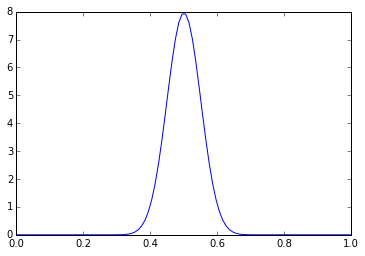

<function __main__.show_beta>

In [10]:
def compute_beta(x, a, b):
    return (math.gamma(a+b)/(math.gamma(a)*math.gamma(b))) * (x**(a-1)) * ((1-x)**(b-1))

def show_beta(alpha, beta):
    x = np.linspace(0, 1, 100)
    y = [compute_beta(xx, alpha, beta) for xx in x]
    plt.plot(x, y)
    plt.show()
    
interact(show_beta, alpha=(0.5,100,0.5), beta=(0.5,100,.5))

t Distribution
================

$f(x) = \frac{\Gamma(\frac{\nu+1}{2})}{\Gamma(\frac{\nu}{2})}
(1+\frac{x^2}{\nu})^{-\frac{\nu+1}{2}}
$

Here, $\nu$ is the #degrees of freedom

* Has thicker tails than Gaussian
* Becomes Gaussian at $\nu = \infty$
* Becomes [Cauchy distribution](http://www.wikiwand.com/en/Cauchy_distribution) at $\nu = 1$

If we take a sample of n observations from a normal distribution, then the t-distribution with $\nu=n-1$ degrees of freedom can be defined as the distribution of the location of the true mean, relative to the sample mean and divided by the sample standard deviation, after multiplying by the normalizing term $\sqrt{n}$. In this way, the t-distribution can be used to estimate how likely it is that the true mean lies in any given range.

Let $x_1, ..., x_n$ be the numbers observed in a sample from a continuously distributed population with expected value $\mu$. The sample mean and sample variance are given by:

$$
\begin{align}
\bar{x} &= \frac{x_1+\cdots+x_n}{n} \\
s^2 &= \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2
\end{align}
$$

The resulting t-value is
$t = \frac{\bar{x} - \mu}{s/\sqrt{n}}.$

Uses:  
Student's t-distribution arises in a variety of statistical estimation problems where the goal is to estimate an unknown parameter, such as a mean value, in a setting where the data are observed with additive errors. If (as in nearly all practical statistical work) the population standard deviation of these errors is unknown and has to be estimated from the data, the t-distribution is often used to account for the extra uncertainty that results from this estimation. In most such problems, if the standard deviation of the errors were known, a normal distribution would be used instead of the t-distribution.


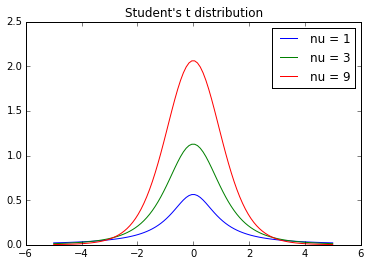

In [11]:
def compute_students_t(x, v):
    term1 = math.gamma((v+1)/2) / math.gamma(v/2)
    term2 = (1 + x**2/v) ** (-((v+1)/2))
    return term1*term2

def show_students_t(v):
    x = np.linspace(-5,5,100)
    y = [compute_students_t(xx, v) for xx in x]
    plt.plot(x, y)
    plt.show()
    
arr_v = [1,3,9]
x = np.linspace(-5,5,100)
for vv in arr_v:
    plt.plot(x, [compute_students_t(xx,vv) for xx in x], 
             label='nu = ' + str(vv))
    
plt.legend()
plt.title("Student\'s t distribution")
plt.show()
    
#interact(show_students_t, v=(1,100))

Cauchy Distribution
===========================

* aka 
  * especially among physicists, as the Lorentz distribution (after Hendrik Lorentz)
  * Cauchy–Lorentz distribution
  * Lorentz(ian) function
  * Breit–Wigner distribution

* **pdf**  
$f(x; x_0,\gamma) = \frac{1}{\pi\gamma \left[1 + \left(\frac{x - x_0}{\gamma}\right)^2\right]} = { 1 \over \pi \gamma } \left[ { \gamma^2 \over (x - x_0)^2 + \gamma^2  } \right]$  
where
  * $x_0$ is the location parameter, specifying the location of the peak of the distribution
  * $\gamma$ is the scale parameter which specifies the half-width at half-maximum (HWHM)
    * alternatively $2 \gamma$ is full width at half maximum (FWHM)
    * $\gamma$ is also equal to half the interquartile range
    * Sometimes called the probable error.

* $\text{Amplitude (or  height)} = \frac{1}{\pi\gamma}$ 

* **cdf**  
$F(x; x_0,\gamma)=\frac{1}{\pi} \arctan\left(\frac{x-x_0}{\gamma}\right)+\frac{1}{2}$


* **Standard Cauchy distribution** ($x_0 = 0, ~ \gamma = 1$)  
  * pdf  
    * $f(x; 0,1) = \frac{1}{\pi (1 + x^2)}$
  * cdf  
    * $F(x; 0,1)=\frac{1}{\pi} \arctan\left(x\right)+\frac{1}{2}$


* The Cauchy distribution is an example of a distribution which has no mean, variance or higher moments defined. Its mode and median are well defined and are both equal to $x_0$.
* When U and V are two independent normally distributed random variables with expected value 0 and variance 1, then the ratio U/V has the standard Cauchy distribution.
* If $X_1, \cdots , X_n$ are independent and identically distributed random variables, each with a standard Cauchy distribution, then the sample mean $(X_1+ \cdots +X_n)/n$ has the same standard Cauchy distribution.

* The Cauchy distribution is an [infinitely divisible probability distribution](http://www.wikiwand.com/en/Infinitely_divisible_probability_distribution).
* It is also a strictly [stable](http://www.wikiwand.com/en/Stability_(probability%29) distribution.[7]
* The standard Cauchy distribution coincides with the Student's t-distribution with one degree of freedom.

* $f_X(x) = 1/(\pi(1 + x^2))$. Using integration by parts, (set u = x and v = ${tan}^{−1} x$),   
$$
\begin{align}
\int |x| ~ dF(x) & = \frac{2}{\pi} \int_{0}^{\infty} \frac{x ~ dx}{1 + x^2} \\
 &= \left[ x ~ {tan}^{-1}(x) \right]_{0}^{\infty} - \int_{0}^{\infty} {tan}^{-1}(x) ~ dx \\
&= \infty
\end{align}
$$  
so the mean does not exist. If you simulate a Cauchy distribution many times and take the average, you will see that the average never settles down. This is because the Cauchy has thick tails and hence extreme observations are common  \cite{Wasserman2010}



Chi Squared ( $\chi^2$ ) Distribution
==========================

X has a $\chi^2$ distribution with $k$ degrees of freedom,
written $X ~ \sim ~ \chi_p^2$ if,

$f(x) = \frac{1}{2^{\frac{k}{2}} \Gamma\left(\frac{k}{2}\right)}\;
x^{\frac{k}{2}-1} e^{-\frac{x}{2}}\,$

If $Z_1, \cdots, Z_n$ are independent standard Normal RV's, then 

$\sum_{i=1}^{n} Z_i^2 ~ \sim ~~~ \chi_k^2$ 

From [wolfram](http://mathworld.wolfram.com/Chi-SquaredDistribution.html)  
* This makes the $\chi^2$ distribution a gamma distribution with scale parameter $\theta=2$ and shape parameter $\alpha=k/2$.  
* For $r \le 2$, f(x) is monotonically decreasing.  
* For $r \ge 3$, it has a maximum at $r-2$

From [somewhere](http://www.math.uah.edu/stat/special/ChiSquare.html) ($k$ is referred as $n$ here)
1. $0 \lt k \lt 2$, f(x) is monotonically decreasing, with $f(x) \rightarrow \infty$ as $x \downarrow 0$
2. $k=2$: $f$ is decreasing with $f(0) = \frac{1}{2}$
3. $k > 2$, $f$ increases and then decreases with mode at $n-2$
4. $0 \lt k \le 2$, $f$ is concave downward
5. $2 \lt k \le 4$, $f$ is concave downward and then upward with the inflection point at $n - 2 + \sqrt{2n-4}$
6. $k \gt 4$, $f$ is concave upward, then downward and then upward with the inflection points at $n - 2 \pm \sqrt{2n-4}$

From [khan academy](https://www.khanacademy.org/math/probability/statistics-inferential/chi-square/)
* the curves show the probability of $x$ occurring
* for $k=1$, there is a high probability of a value occurring close to zero. 
* for $k=1$, it is just $0.5$

Titbits:  
* Rarely used to model natural phenomena
* Used extensively in hypothesis testing because of its relationship to the normal distribution
* Should be used if the large sample size. If the sample size is small, t-distribution is preferred [why?]

Stats:  
Mean: $k$  
Variance: $2k$

Uses:  
1. [chi-squared test](https://www.wikiwand.com/en/Chi-squared_test)  for goodness of fit of an observed distribution to a theoretical one.
2. independence of two criteria of classification of qualitative data
3. confidence interval estimation for a population standard deviation of a normal distribution from a sample std. deviation
4. [Likelihood-ratio test](https://www.wikiwand.com/en/Likelihood-ratio_test) for nested models

/Users/dragon/Library/Python/3.5/lib/python/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


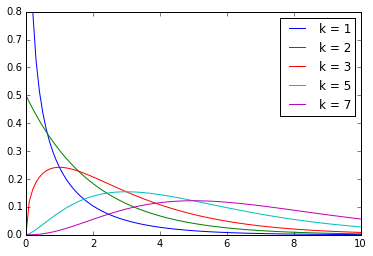

In [12]:
def compute_chi_squared(x, k):
    nr = x**(k/2. - 1) * (math.e**(-x/2.))
    dr = (2**(k/2.)) * (math.gamma(k/2.))
    return nr/dr

def show_chi_squared(k):
    x = np.linspace(0, 10, 100)
    y = [compute_chi_squared(xx, k) for xx in x]
    plt.plot(x, y, label='k = ' + str(k))

k = [1,2,3,5,7]
[show_chi_squared(kk) for kk in k]
plt.legend(loc='upper right')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,0.8))
plt.show()

*******************************************

Pearson's chi-squared test
================

* applicable to categorical data 
* How likely is the observed difference arose by chance
* tests the null hypothesis 
* Events considered must be mutually exclusive and have total probability of 1
* used to assess two types of comparison
  * [Goodness of fit](https://www.wikiwand.com/en/Goodness_of_fit): whether or not the observed frequency distribution differs from a theoretical / expected distribution
  * Test of independence: Whether unpaired observations of two variables, expressed in a contingency table are independent of each other. For ex, the polling repsonses from people of different nationalities if one's nationality is related to the response
  
Procedure
--------
1. Calculate the chi-squared test statistic, $\chi^2$, which resembles a normalized sum of squared deviations between observed and theoretical frequencies (see below).
2. Determine the [degrees of freedom](https://www.wikiwand.com/en/Degrees_of_freedom_(statistics)), $df$, of that statistic, which is essentially the number of categories reduced by the number of parameters of the fitted distribution.
3. Select a desired level of confidence (significance level, [p-value](https://www.wikiwand.com/en/P-value) [explanation](http://stats.stackexchange.com/questions/31/what-is-the-meaning-of-p-values-and-t-values-in-statistical-tests) or alpha level) for the result of the test.
4. Compare $\chi^2$ to the critical value from the chi-squared distribution with df degrees of freedom and the selected confidence level (one-sided since the test is only one direction, i.e. is the test value greater than the critical value?), which in many cases gives a good approximation of the distribution of $\chi^2$.
5. Accept or reject the null hypothesis that the observed frequency distribution is different from the theoretical distribution based on whether the test statistic exceeds the critical value of $\chi^2$. If the test statistic exceeds the critical value of $\chi^2$, the null hypothesis ($H_o$ = there is no difference between the distributions) can be rejected with the selected level of confidence and the alternative hypothesis ($H_a$ = there is a difference between the distributions) can be accepted with the selected level of confidence.

Example
----------

Given Data ([Khan Academy](https://www.khanacademy.org/math/probability/statistics-inferential/chi-square/v/contingency-table-chi-square-test))

|  	        | Herb 1 	| Herb 2 	| Placebo 	|
|---	    |---	    |---	    |---	    |
| Sick 	    |  	20      | 30        | 30        |
| Not Sick 	|  100      | 110       | 90        |

Null Hypothesis $H_0$: No difference between herbs and Placebo.  
$H_a$: Herbs show some effect

Compute the totals

|  	        | Herb 1 	| Herb 2 	| Placebo 	| *Total* 	|
|---	    |---	    |---	    |---	    |--- 	 	|
| Sick 	    | 20 	 	| 30        | 30        | <span class="mark">*80*</span> 	 	|
| Not Sick 	| 100 	 	| 110       | 90        | <span class="mark">*300*</span>	 	|
| *Total*	| <span class="mark">*120*</span> 	| <span class="mark">*140*</span> 	| <span class="mark">*120*</span> 	| <span class="mark">*380*</span>	 	|


Find the percentages

|  	        | Herb 1 	| Herb 2 	| Placebo 	| *Total* 				|
|---	    |---	    |---	    |---	    |--- 	 				|
| Sick		| 20 	 	| 30        | 30        | *80*  <br> <span class="mark">(*21%*)</span>	|
| Not Sick 	| 100 	 	| 110       | 90        | *300* <br> <span class="mark">(*79%*)</span>	|
| *Total*	| *120* 	| *140* 	| *120* 	| *380*	 				|


Find expected values (Question: why take 21% of 120, 140 and 120?)

|  	        | Herb 1			| Herb 2 				| Placebo 			| *Total* 				|
|---	    |---	    		|---					|---				|--- 	 				|
| Sick		| 20 <br> <span class="mark">(*25.3*)</span>	| 30 <br> <span class="mark">(*29.4*)</span>		| 30 <br> <span class="mark">(*25.3*)</span>	| *80*  <br> (*21%*)	|
| Not Sick 	| 100 <br> <span class="mark">(*94.7*)</span>	| 110 <br> <span class="mark">(*110.6*)</span>	| 90 <br> <span class="mark">(*94.7*)</span>	| *300* <br> (*79%*)	|
| *Total*	| *120* 			| *140* 				| *120* 			| *380*	 				|

Compute the statistic:  
$$ \sum_{i} (O_i-E_i)^2/E_i \\
= (20-25.3)^2/25.3 + (30-29.4)^2/29.4 + (30-25.3)^2/25.3 + \\
(100-94.7)^2/94.7 + (110-110.6)^2/110.6 + (90-94.7)^2/94.7 \\
 = 2.53
$$

Now, say the significance level is 0.10 (10%).  
The d.f. is $(r-1)(c-1)$ = $1 \times 2$ = $2$  
From the tables, we find the critical value for $0.10$ is $\chi_2^2(0.10) = 4.60$. This value can be thought of as the max allowed value of the statistic.   
That is, $P(X>4.60) = 0.10$  
Since the computed value, $2.53 < 4.60$, we accept $H_0$, which is there is no difference between the placebo and the herbs.
  
Caveats
-------
1. Breaks down if the expected frequencies are too low.
2. Acceptable as long as no more than 20% of the events have expected frequencies less than 5.
3. If there is one d.f., then approximation is not reliable if the expected frequencies are below 10.
4. In such cases, use [Yates' correction for continuity](https://www.wikiwand.com/en/Yates%27s_correction_for_continuity): reduce the abs. value of the difference by 0.5 before squaring

**************************

Bivariate distributions
=================

Example

$$
f(x) = 
\begin{cases}
x+y & if ~0 \le x,y \le 1\\
0 & \text{otherwise}
\end{cases}
$$

Cumulative distribution:  
$$
\begin{align}
F(x) & = \int_0^{x_1} \int_0^{y_1} x+y dx dy\\
     & = \int_0^{y_1} \left\{ \int_0^{x_1} x dx\right\} dy + 
         \int_0^{y_1} \left\{ \int_0^{x_1} y dx\right\} dy \\
     & = \int_0^{y_1} \frac{x_1^2}{2} dy + 
         \int_0^{y_1} x_1 y dy \\
     & = \frac{x_1^2 y_1 + x_1 y_1^2}{2} \\ 
     & = \frac{x_1 y_1 (x_1 + y_1) }{2}
\end{align}
$$

In [13]:
for x1,x2 in enumerate([1,3,5]):
    print(x1,x2)

0 1
1 3
2 5


/Users/dragon/Library/Python/3.5/lib/python/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


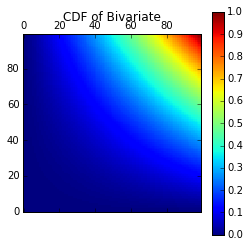

In [14]:
# cumulative distribution
def compute_bivariate_cdf(x, y):
    return x*y*(x+y)/2.

in_bivariate_cdf = 100
xy = np.linspace(0, 1, in_bivariate_cdf)
mat1 = np.zeros((in_bivariate_cdf,in_bivariate_cdf))
for ix, xx in enumerate(xy):
    for iy, yy in enumerate(xy):
        mat1[ix, iy] = compute_bivariate_cdf(xx, yy)
        

plt.matshow(mat1)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('CDF of Bivariate')
plt.show()

********************************

Independence of Random Variables
========================

Two RV's, X \& Y are independent, if, $\forall A,B$,  
$$\mathbb{P}(X \in A, Y \in B) = \mathbb{P}(X \in A) \mathbb{P}(Y \in B)$$.  
It is written as $X \amalg Y$ or $X \perp Y$.  

We need to check the above for all subsets A,B. But there are other better ways.

**Method 1:**  
If X,Y has joint PDF $f_{X,Y}$. Then $X \amalg Y$ iff $f_{X,Y}(x,y) = f_X(x) f_Y(y)$ for all values x,y. This holds good for both discrete as well as continuous.

**Method 2:**  
Suppose that the range of X and Y is a (possibly infinite) rectangle. If $f(x,y) = g(x) ~ h(y)$ for some function $g,h$ which need not be pdf's themselves, then $X \amalg Y$.

More than two events
-------------------
A finite set of events {A_i} is *pairwise independent* if and only if every pair of events is independent. That is, $\forall m, ~k$,  
$$\mathbb{P}(A_m \cap A_k) = \mathbb{P}(A_m) ~ \mathbb{P}(A_k)$$

A finite set of events is *mutually independent* if and only if every event is independent of any intersection of the other events. That is, for every n-element subset $\{A_i\}$,  
$$\mathbb{P}\left( \bigcap_{i=1}^n A_i \right) = 
\prod_{i=1}^n \mathbb{P}(A_i)$$  
* This is called the multiplication rule for independent events.  
* For more than 2 events, mutual independece $\Rightarrow$ Pairwise Independence and not the other way around.

*********************************************
Pairwise independent, not mutually independent
![Alt text](images/440px-Pairwise_independent.svg.png "Pairwise but not mutually independent")

$\mathbb{P}(A) = \mathbb{P}(B) = 1/2$ and $\mathbb{P}(C) = 1/4$.  
$$
\begin{align}
\mathrm{P}(A|BC) &= \frac{ \frac{4}{40} }
                         {\frac{4}{40} + \frac{1}{40}}
                 &= \frac{4}{5}
                 & \ne \mathrm{P}(A)\\
\mathrm{P}(B|AC) &= \frac{ \frac{4}{40} }
                         {\frac{4}{40} + \frac{1}{40}}
                 & = \frac{4}{5} 
                 &\ne \mathrm{P}(B)\\
\mathrm{P}(C|AB) &= \frac{\frac{4}{40}}
                         {\frac{4}{40} + \frac{6}{40}}
                 &= \frac{2}{5} 
                 &\ne \mathrm{P}(C)
\end{align}
$$




![Alt Text](images/440px-Mutually_independent.svg.png "Mutually independent")
$\mathbb{P}(A) = \mathbb{P}(B) = 1/2$ and $\mathbb{P}(C) = 1/4$.  

$$
\begin{align}
\mathrm{P}(A|BC) &= \frac{\frac{1}{16}}
                         {\frac{1}{16} + \frac{1}{16}}
                 &= \tfrac{1}{2}
                 &= \mathrm{P}(A) \\
\mathrm{P}(B|AC) &= \frac{\frac{1}{16}}
                         {\frac{1}{16} + \frac{1}{16}}
                 &= \tfrac{1}{2}
                 &= \mathrm{P}(B)\\
\mathrm{P}(C|AB) &= \frac{\frac{1}{16}}
                         {\frac{1}{16} + \frac{3}{16}}
                 &= \tfrac{1}{4}
                 &= \mathrm{P}(C)
\end{align}
$$

*********************************************
Mutual Independence

George, Glyn, "Testing for the independence of three events," Mathematical Gazette 88, November 2004, 568 [pdf](resources/testing-for-independence-of-three-events.pdf)

![Mutual, not pairwise](images/mutual-independence-not-pairwise.png)

$\mathbb{P}(ABC) = \mathbb{P}(A) \mathbb{P}(B) \mathbb{P}(C) = 0.04$

But no two of the 3 events are pairwise independent.

$$
\begin{align}
\mathbb{P}(AB) &= 0.10 
& \text{but } & \mathbb{P}(A) \times \mathbb{P}(B)
= 0.2 \times 0.4 = 0.08\\
\mathbb{P}(BC) &= 0.24 
& \text{but } & \mathbb{P}(B) \times \mathbb{P}(C)
= 0.4 \times 0.5 = 0.20\\
\mathbb{P}(CA) &= 0.14 
& \text{but } & \mathbb{P}(C) \times \mathbb{P}(C)
= 0.5 \times 0.2 = 0.10
\end{align}
$$

Problems
=====================

13. Transformation of RV's
----

$Y = e^{X}$ and $X \sim N(0,1)$

$$
\begin{align}
P(Y=y) = P(X = ln(y)) = \frac{1}{\sqrt{2\pi}} e^{-(\ln{y})^2/2}
\end{align}
$$

yo


NameError: name 'in_bins0' is not defined

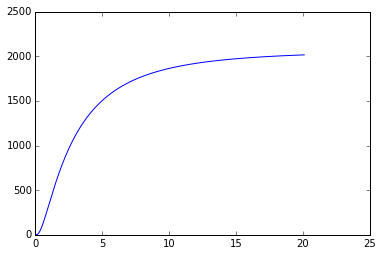

In [15]:
import math
def p_y(y):
    term1 = 1./math.sqrt(2*math.pi)
    term1 = 1.
    term2_pwr = -(math.log(y)**2) / 2.0
    return term1 * math.e**term2_pwr

def normal_mine(x):
    term1 = 1./math.sqrt(2*math.pi)
    term1 = 1.
    term2_pwr = -x**2/2.
    return term1 * math.e**term2_pwr

def find_format_hist(data, in_pts, in_bins):
    hist, edges = np.histogram(data, bins=in_bins)

    dist_cum = np.matrix([sum(hist[:ix])/(1.*in_pts) for ix in range(in_bins)])
    bin_centers = (edges[1:]+edges[:-1])/2.
    
    bin_centers = bin_centers.reshape((in_bins,1))
    dist_cum = dist_cum.reshape((in_bins0,1))
    
    return (bin_centers, dist_cum)

in_pts = 10000
e_power = math.e**3
y = np.linspace(1./e_power, e_power, in_pts)
p_y_exp = [p_y(yy) for yy in y]
sum_exp = sum(p_y_exp)
sum_exp = 1.
cdf_exp = [sum(p_y_exp[:ix])/sum_exp for ix in range(in_pts)]
plt.plot(y, cdf_exp , label='expected y')

xx = np.random.normal(loc=0.0, scale=1.0, size=(1, in_pts))
xx.sort()

print('yo')
bin_centers0, dist_cum0 = find_format_hist(xx, in_pts, 1000)
plt.plot(bin_centers0, dist_cum0, label='normal sampled')

yy = [math.e**xxx for xxx in xx]

data1 = [yyy for yyy in yy[0] if yyy<=1.0]
bin_centers1, dist_cum1 = find_format_hist(data1, in_pts, 1000)
print(dist_cum1[-1,0])
plt.plot(bin_centers1, dist_cum1, label='first half')

data2 = [yyy for yyy in yy[0] if yyy>1.0]
bin_centers2, dist_cum2 = find_format_hist(data2, in_pts, 1000)
#plt.plot(bin_centers2, dist_cum2, label='second half')

x_min, x_max = plt.xlim()
#plt.xlim((-20, 40.0))

#plt.legend(loc='upper left')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# # hist2, edges2 = np.histogram([yyy for yyy in yy[0] if yyy>1.0], 10)
# # plt.plot((edges2[1:]+edges2[:-1])/2., hist2/(1.*in_pts), label='y actual > 1')

# # bin_size = 10
# # cdf = np.zeros((1,bin_size+1))
# # #print(cdf)
# # prev = 0.0
# # for ix, xx_hist in enumerate(range(bin_size+1)):
# #     edge1 = xx_hist/(1.*bin_size)
# #     current = len([yyy for yyy in yy[0] if yyy<=edge1])/(1.*in_pts)
# #     #print(edge1, current-prev)
# #     plt.plot(edge1, current-prev, '*', markersize=15)
# #     cdf[0,ix] = current
# #     prev = current
    
# plt.show()
# #print(cdf)


2015.496543034324


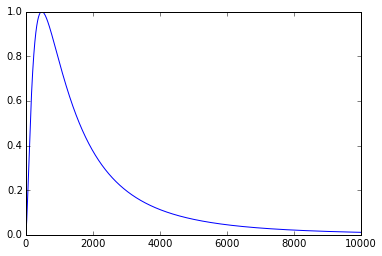

In [16]:
plt.plot(p_y_exp)
print(sum(p_y_exp))

In [17]:
y=1.
term1 = 1./math.sqrt(2*math.pi)
print(term1)
term2_pwr = -(math.log(y)**2) / 2.0
print(term2_pwr)
print(term1 * math.exp(term2_pwr))

print(math.sqrt(2))
print(math.pi)
print(math.log(math.e))

0.3989422804014327
-0.0
0.3989422804014327
1.4142135623730951
3.141592653589793
1.0


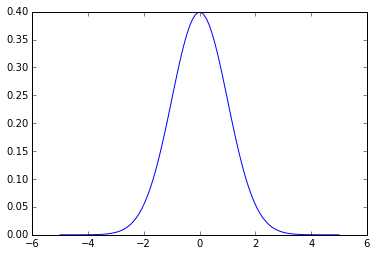

In [18]:
def p_y(x):
    term1 = 1./math.sqrt(2*math.pi)
    term2_pwr = -(x**2) / 2.0
    return term1 * math.e**term2_pwr

x = np.linspace(-5,5,100)
yy = [p_y(xx) for xx in x]
plt.plot(x, yy)
plt.show()


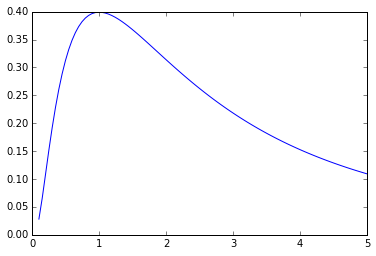

24.329661402051006


In [19]:
def p_y(y):
    term1 = 1./math.sqrt(2*math.pi)
    term2_pwr = -(math.log(y)**2) / 2.0
    return term1 * math.e**term2_pwr

x = np.linspace(0.1, 5, 100)
yy = [p_y(xx) for xx in x]
plt.plot(x, yy)
plt.show()
print(sum(yy))

14. Sampling from a circle
---------------------------------

In [20]:
def compute_hist(data, in_pts, in_bins):
    hist, edges = np.histogram(data, bins=in_bins)

    dist_cum = np.matrix([sum(hist[:ix])/(1.*in_pts) for ix in range(in_bins)])
    bin_centers = (edges[1:]+edges[:-1])/2.
    
    bin_centers = bin_centers.reshape((in_bins,1))
    dist_cum = dist_cum.reshape((in_bins,1))
    
    return (bin_centers, dist_cum, hist, edges)

def plot_circle(radius=1):
    thetas = np.linspace(0, 1, 100)* 2*math.pi
    pts = np.asarray([polar_to_cartesian(theta, radius) for theta in thetas])
    plt.plot(pts[:,0], pts[:,1])
    

Method 1:  
Choose x uniformly from [-1,1] and choose a y in $[-\sqrt{1-x^2}, \sqrt{1-x^2}]$

In [21]:
def validate_on_circle(x, y):
    is_valid=reduce(lambda zzz, t: zzz and t, 
                    [abs(zz-1.)<1e-8 for zz in (x**2+y**2)],
                    True)
    print('x and y on circle? :: ' + ('yes' if is_valid[0] else 'no'))

def validate_inside_circle(arr_r, radius=1.):
    is_valid=reduce(lambda zzz, t: zzz and t, [zz<=radius for zz in arr_r][0], True)
    print('x and y_rand inside? :: ' + ('yes' if is_valid else 'no'))


In [22]:

in_pts, radius = 5e4, 1.
x = np.random.rand(in_pts,1)*2.*radius - radius
x.sort()
y = np.sqrt(radius**2 - x**2)
validate_on_circle(x, y)

y_rand = np.asarray([np.random.rand(1)[0]*(2*yy)-yy for yy in y]).reshape(x.shape)
arr_r = (x**2+y_rand**2)
validate_inside_circle(arr_r, radius)
plot_circle(radius=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(x, y_rand, '.', markersize=1)
plt.show()

bin_centers, dist_cum, hist, edges = compute_hist(arr_r, in_pts, 100)
print(bin_centers.shape)
print(dist_cum.shape)
plt.plot(bin_centers, dist_cum, label='actual cdf')
plt.plot(bin_centers, [ctr**2 for ctr in bin_centers], label='expected cdf')
plt.legend(loc='upper left')
plt.grid()
plt.show()

plt.plot(bin_centers, hist/in_pts, label='actual pdf')
edges_sqrd = np.square(edges)
expected_pdf = edges_sqrd[1:] - edges_sqrd[:-1]
plt.plot(bin_centers, expected_pdf, label='expected pdf')
plt.legend(loc='upper left')
plt.show()

bin_centers_x, cum_pdf, hist_x, edges_x = compute_hist(x, in_pts, in_bins=50)
plt.plot(bin_centers_x, hist_x, label='X Histogram')
bin_centers_y, cum_pdf, hist_y, edges_y = compute_hist(y_rand, in_pts, in_bins=50)
plt.plot(bin_centers_y, hist_y, label='Y Histogram')
plt.title('X-Y Histogram')
plt.legend()
plt.show()

x and y on circle? :: yes
x and y_rand inside? :: yes


/Users/dragon/Library/Python/3.5/lib/python/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


NameError: name 'polar_to_cartesian' is not defined

Method 2:  
* choose two points randomly on the circumference of the circle
  * sample two values for $\theta$ from $[0, 2\pi)$
* find (x,y) for these points
* find the midpoint of the chord formed by these points  
 

In [23]:
def check_mid_pts(mid_pts, radius=1.):
    mid_pts_valid = reduce(lambda length,total: (length<=1.*radius) and total,
                       [(x**2+y**2) for (x,y) in mid_pts],
                       True)
    print('midpts valid?: ' + ('yes' if mid_pts_valid else 'no'))

def polar_to_cartesian(theta, radius=1):
    return [radius*math.cos(theta), radius*math.sin(theta)]
def midpoint(pt1, pt2):
    x1, y1 = pt1
    x2, y2 = pt2
    return [(x1+x2)/2., (y1+y2)/2.]


midpts valid?: yes


/Users/dragon/Library/Python/3.5/lib/python/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


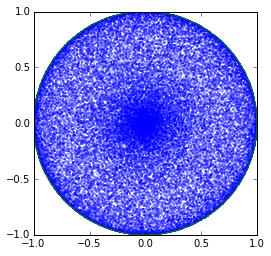

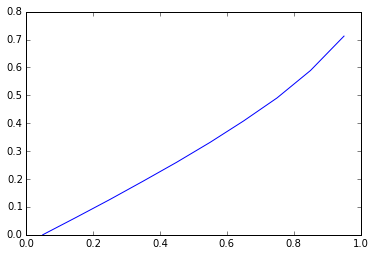

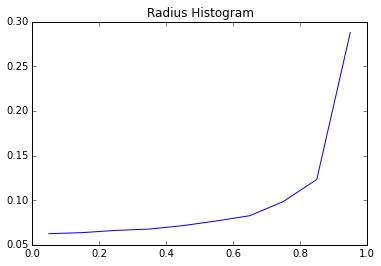

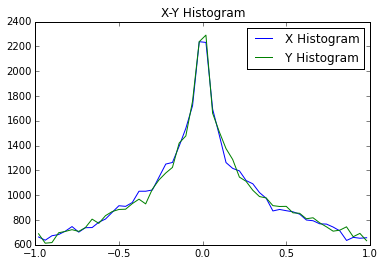

In [24]:
in_pts, radius = 5e4, 1
arr_thetas = np.random.rand(in_pts, 2) * 2*math.pi
mid_pts = np.asarray([midpoint(polar_to_cartesian(thetas[0]), polar_to_cartesian(thetas[1]))
                      for thetas in arr_thetas])
check_mid_pts(mid_pts, radius)
plt.plot(mid_pts[:,0], mid_pts[:, 1], '.', markersize=1)
plot_circle(radius)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

radii = np.sqrt(mid_pts[:,0]**2 + mid_pts[:,1]**2)
bin_centers_r, cum_pdf_r, hist_r, edges_r = compute_hist(radii, in_pts, in_bins=10)
plt.plot(bin_centers_r, cum_pdf_r)
plt.show()

plt.plot(bin_centers_r, hist_r/(in_pts*1.))
plt.title('Radius Histogram')
plt.show()

bin_centers_x, cum_pdf, hist_x, edges_x = compute_hist(mid_pts[:,0], in_pts, in_bins=50)
plt.plot(bin_centers_x, hist_x, label='X Histogram')
bin_centers_y, cum_pdf, hist_y, edges_y = compute_hist(mid_pts[:,1], in_pts, in_bins=50)
plt.plot(bin_centers_y, hist_y, label='Y Histogram')
plt.title('X-Y Histogram')
plt.legend()
plt.show()

Transformation of multiple RV's
---------------

$X,Y \sim U(0,1)$

Z=X+Y  
* compute the cdf as follows
* find $X+Y=z$ over multiple values of z
* $Z \in [0,2)$
* four ranges
  * $Z < 0$, $Z \in [0, 1)$, $Z \in [1, 2)$, $Z \ge 0$
  
* $\mathbb{P}(Z \lt z: z \in [0,1)$ = Area(blue triangle) = $\frac{1}{2} z^2$
* $\mathbb{P}(Z \lt z: z \in [1,2)$ = 1 - $\mathbb{P}(Z \gt z: z \in [1,2)$ = 1 - Area(red triangle)
= $1 - \frac{1}{2} (2-z)^2$

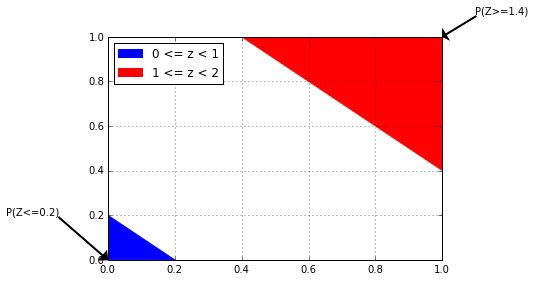

<function __main__.show_x_plus_y>

In [25]:
import matplotlib.lines as pltline
import matplotlib.patches as pltpatch

def show_poly(ax, vertices, color='b', label=''):
    ax.add_patch(pltpatch.Polygon(vertices,
                                       closed=True,
                                       fill=True,
                                       color=color, label=label
                                      )
                     )

def show_x_plus_y(z1=0.2, z2=1.4):
    fig = plt.figure()
    arrowprops = dict(facecolor='black', width=1)
    
    ax1 = fig.add_subplot(111)
    case_1_poly = [[0, 0], [0, z1], [z1, 0]]
    show_poly(ax1, case_1_poly, color='b', label='0 <= z < 1')
    ax1.annotate('P(Z<='+str(z1)+')', xy=(0.0, 0.0), xytext=(-0.3, 0.2), arrowprops=arrowprops)
    
    case_2_poly = [[1, 1], [1, z2-1], [z2-1, 1]]
    show_poly(ax1, case_2_poly, color='r', label='1 <= z < 2')
    ax1.annotate('P(Z>='+str(z2)+')', xy=(1.0, 1.0), xytext=(1.1, 1.1), arrowprops=arrowprops)

    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()
    

interact(show_x_plus_y, z1=(0,1,0.1), z2=(1,2,0.1))

$$
F(z) = \mathbb{P}(Z \le z) =
\begin{cases}
0                       & z \lt 0\\
\frac{1}{2} z^2         & z \in [0, 1)\\
1 - \frac{1}{2} (2-z)^2 & z \in [1, 2)\\
1                       & z \ge 2
\end{cases}
$$

$$
f(z) = \mathbb{P}(Z = z) =
\begin{cases}
z     & z \in [0, 1)\\
(2-z) & z \in [1, 2)\\
0     & elsewhere
\end{cases}
$$

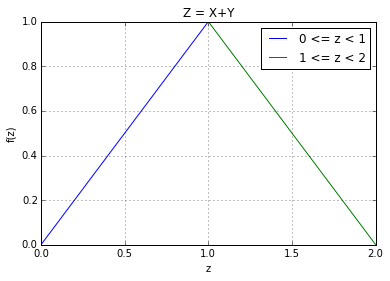

In [26]:
x = np.linspace(0, 1, 100)
y = [xx for xx in x]
plt.plot(x, y, label='0 <= z < 1')

x = np.linspace(1, 2, 100)
y = [2-xx for xx in x]
plt.plot(x, y, label='1 <= z < 2')
plt.legend()
plt.grid()
plt.title('Z = X+Y')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.show()

*******************************

$X,Y \sim U(0,1)$

Z=X-Y  
* compute the cdf as follows
* find $X-Y=z$ over multiple values of z
* $Z \in (-1,1)$
* four ranges
  * $Z < -1$, $Z \in (-1, 0[$, $Z \in [0, 1)$, $Z \ge 1$
  
* $\mathbb{P}(Z \lt z: z \in (-1,0]$ = Area(blue triangle) = $\frac{1}{2} (1+z)^2 $
* $\mathbb{P}(Z \lt z: z \in [0,1)$ = 1 - $\mathbb{P}(Z \gt z: z \in [0,1)$ = 1 - Area(red triangle)
= $1 - \frac{1}{2} (1-z)^2$

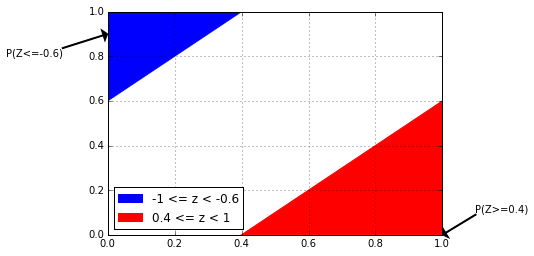

<function __main__.show_x_minus_y>

In [27]:
import matplotlib.lines as pltline
import matplotlib.patches as pltpatch

def show_poly(ax, vertices, color='b', label=''):
    ax.add_patch(pltpatch.Polygon(vertices,
                                  closed=True, fill=True,
                                  color=color, label=label))

def show_x_minus_y(z1=-0.6, z2=0.4):
    fig = plt.figure()
    arrowprops = dict(facecolor='black', width=1)
    
    ax1 = fig.add_subplot(111)
    case_1_poly = [[0, 1], [0, -z1], [1+z1, 1]]
    show_poly(ax1, case_1_poly, color='b', label='-1 <= z < '+str(z1))
    ax1.annotate('P(Z<='+str(z1)+')', xy=(0.0, 0.9), xytext=(-0.3, 0.8), arrowprops=arrowprops)
    
    case_2_poly = [[1, 0], [z2, 0], [1, 1-z2]]
    show_poly(ax1, case_2_poly, color='r', label=str(z2) + ' <= z < 1')
    ax1.annotate('P(Z>='+str(z2)+')', xy=(1.0, 0.0), xytext=(1.1, 0.1), arrowprops=arrowprops)

    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()
    

interact(show_x_minus_y, z1=(-1.0,0,0.1), z2=(0,1,0.1))

$$
F(z) = \mathbb{P}(Z \le z) =
\begin{cases}
0                       & z \lt -1\\
\frac{1}{2} (1+z)^2         & z \in (-1, 0]\\
1 - \frac{1}{2} (1-z)^2 & z \in [0, 1)\\
1                       & z \ge 1
\end{cases}
$$

$$
f(z) = \mathbb{P}(Z = z) =
\begin{cases}
1+z  & z \in (-1, 0]\\
1-z  & z \in [0, 1)\\
0    & elsewhere
\end{cases}
$$

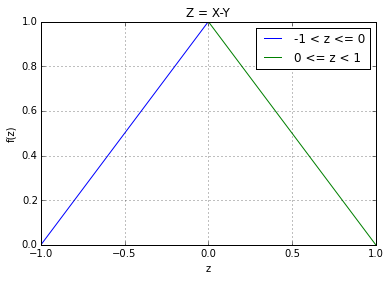

In [28]:
x = np.linspace(-1, 0, 100)
y = [1+xx for xx in x]
plt.plot(x, y, label='-1 < z <= 0')

x = np.linspace(0, 1, 100)
y = [1-xx for xx in x]
plt.plot(x, y, label='0 <= z < 1')
plt.legend()
plt.grid()
plt.title('Z = X-Y')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.show()

*******************************

$X,Y \sim U(0,1)$

Z=X/Y  
* compute the cdf as follows
* find $X-Y=z$ over multiple values of z
* $Z \in (-\infty,\infty)$
* two ranges
  * $Z < 1 $, $Z \ge 1$
  
* $\mathbb{P}(Z \lt z: z \in (-\infty,1]$ = Area(blue triangle) = $\frac{1}{2} (1+z)^2 $
* $\mathbb{P}(Z \lt z: z \in [0,1)$ = 1 - $\mathbb{P}(Z \gt z: z \in [0,1)$ = 1 - Area(red triangle)
= $1 - \frac{1}{2} (1-z)^2$


/Users/dragon/Library/Python/3.5/lib/python/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


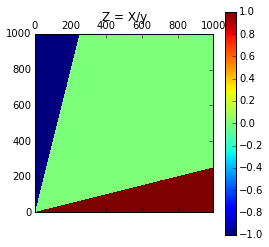

In [29]:
in_pts = 1000
xy = np.linspace(0, 1, in_pts)
mat1 = np.zeros((in_pts, in_pts))
for ix, xx in enumerate(xy):
    if xx < 1e-3:
        continue
    for iy, yy in enumerate(xy):
        if yy < 1e-3:
            continue
        result = xx/yy
        if result > 4:
            #mat1[iy, ix] = math.log(xx/yy)
            mat1[iy, ix] = 1
        if result < 0.25:
            mat1[iy, ix] = -1

plt.matshow(mat1)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('Z = X/y')

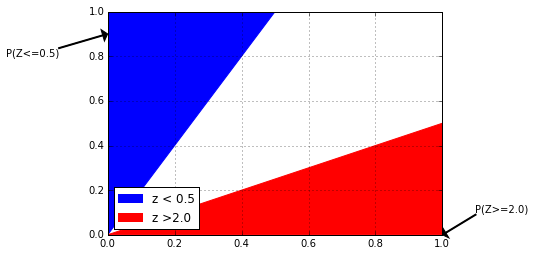

<function __main__.show_x_div_y>

In [30]:
import matplotlib.lines as pltline
import matplotlib.patches as pltpatch

def show_poly(ax, vertices, color='b', label=''):
    ax.add_patch(pltpatch.Polygon(vertices,
                                  closed=True, fill=True,
                                  color=color, label=label))

def show_x_div_y(z1=0.5, z2=2):
    fig = plt.figure()
    arrowprops = dict(facecolor='black', width=1)
    
    ax1 = fig.add_subplot(111)
    case_1_poly = [[0, 1], [0, 0], [z1, 1]]
    show_poly(ax1, case_1_poly, color='b', label='z < '+str(z1))
    ax1.annotate('P(Z<='+str(z1)+')', xy=(0.0, 0.9), xytext=(-0.3, 0.8), arrowprops=arrowprops)
    
    case_2_poly = [[1, 0], [0, 0], [1, 1./z2]]
    show_poly(ax1, case_2_poly, color='r', label='z >' + str(z2))
    ax1.annotate('P(Z>='+str(z2)+')', xy=(1.0, 0.0), xytext=(1.1, 0.1), arrowprops=arrowprops)

    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()
    

interact(show_x_div_y, z1=(0.0001,1,0.2), z2=(1,10,0.1))

* $\mathbb{P}(Z \lt z: z \lt 1$ = Area(blue triangle) = $\frac{z}{2} $
* $\mathbb{P}(Z \lt z: z \in [0,1)$ = 1 - $\mathbb{P}(Z \gt z: z \in [0,1)$ = 1 - Area(red triangle)
= $1 - \frac{1}{z}$

$$
F(z) = \mathbb{P}(Z \le z) =
\begin{cases}
\frac{z}{2}      & z < 1.0 \\
1 - \frac{1}{2z}  & z \ge 1
\end{cases}
$$

$$
f(z) = \mathbb{P}(Z = z) =
\begin{cases}
\frac{1}{2}    & z < 1.0 \\
\frac{1}{2z^2}  & z \ge 1
\end{cases}
$$

*********************************
$X_1, \cdots, X_n \sim Exp(\beta)$
$Y = max(X_1, \cdots, X_n)$  
$Y \le y \rightarrow \forall X_i \le y$  
$$
\begin{align}
F(y) &= \mathbb{P}(Y \le y)\\
     &= \prod_{i=1}^n Exp(X_i \le y)\\
     &= (1 - e^{-\beta y})^n
\end{align}
$$

$f(y) = n (1 - e^{-\beta y})^{n-1} (-e^{-\beta y}) (-\beta) = n \beta e^{-\beta y} (1 - e^{-\beta y})^{n-1}$

# References

[<a id="cit-Wasserman2010" href="#call-Wasserman2010">Wasserman2010</a>] !! _This reference was not found in biblio.bib _ !!

